# TP 1 Machine Learning

## Predict Online Gaming Behavior Dataset

El dataset proporcionado contiene información sobre el comportamiento de jugadores en línea. Cada fila representa un jugador y está compuesta por varias características. A continuación, se explica el contenido de cada variable y se define su uso como variable de entrada, salida o no utilizada.

### Descripción de Variables

1. **PlayerID**: Un identificador único para cada jugador.  
   - **Uso**: No utilizada. No aporta información relevante para la predicción.

<br>

2. **Age**: Edad del jugador.  
   - **Uso**: Variable de entrada. Puede influir en el nivel de engagement.

<br>

3. **Gender**: Género del jugador (Male/Female).  
   - **Uso**: Variable de entrada. Puede influir en el nivel de engagement.

<br>

4. **Location**: Región geográfica del jugador.  
   - **Uso**: Variable de entrada. Las diferencias culturales y regionales podrían influir en el engagement.

<br>

5. **GameGenre**: Género del juego preferido por el jugador (Strategy, Sports, Action, etc.).  
   - **Uso**: Variable de entrada. Puede influir en los patrones de engagement.

<br>

6. **PlayTimeHours**: Cantidad total de horas jugadas.  
   - **Uso**: Variable de entrada. El tiempo de juego podría estar relacionado con el engagement.

<br>

7. **InGamePurchases**: Número de compras realizadas dentro del juego.  
   - **Uso**: Variable de entrada. Las compras dentro del juego pueden ser indicativas de engagement.

<br>

8. **GameDifficulty**: Nivel de dificultad del juego (Easy, Medium, Hard).  
   - **Uso**: Variable de entrada. La dificultad del juego puede afectar el nivel de engagement del jugador.

<br>

9. **SessionsPerWeek**: Número de sesiones de juego por semana.  
   - **Uso**: Variable de entrada. La frecuencia de juego puede estar correlacionada con el engagement.

<br>

10. **AvgSessionDurationMinutes**: Duración promedio de cada sesión de juego en minutos.  
    - **Uso**: Variable de entrada. La duración de las sesiones puede ser un indicador del nivel de engagement.

<br>

11. **PlayerLevel**: Nivel del jugador dentro del juego.  
    - **Uso**: Variable de entrada. El nivel del jugador podría reflejar su experiencia y engagement.

<br>

12. **AchievementsUnlocked**: Número de logros desbloqueados por el jugador.  
    - **Uso**: Variable de entrada. Los logros desbloqueados pueden ser un buen predictor del engagement.

<br>

13. **EngagementLevel**: Nivel de engagement del jugador (Low, Medium, High).  
    - **Uso**: Variable de salida. Los valores posibles son "Low", "Medium", y "High".

<br>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('online_gaming_behavior_dataset.csv')

# Visualizar las primeras filas del dataframe
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [2]:
#Eliminamos la columna PlayerID que no sera utilizada
df.drop('PlayerID', axis=1, inplace=True)

df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


## Análisis detallado de un conjunto de variables
2.1 Distribución de la Variable de Salida: EngagementLevel

Primero, vamos a analizar y graficar la distribución de la variable de salida EngagementLevel para entender cómo se distribuyen los datos.

In [39]:
contar_level = (df['EngagementLevel'].value_counts()).sort_index()
print(contar_level)

EngagementLevel
High      10336
Low       10324
Medium    19374
Name: count, dtype: int64


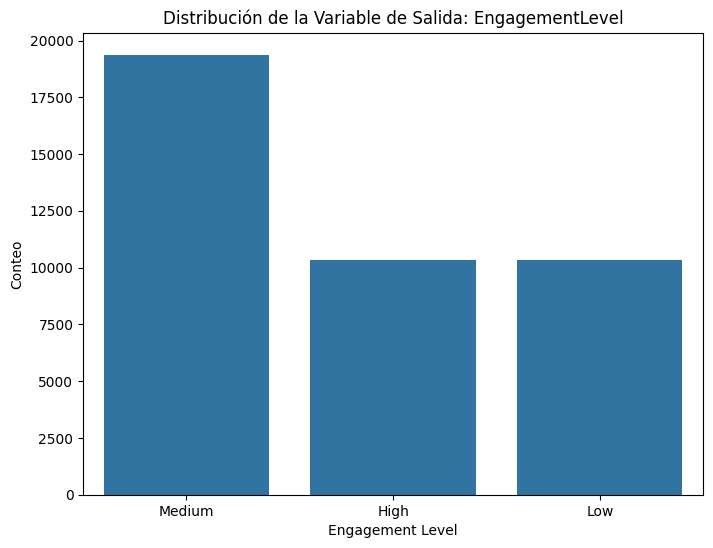

In [2]:
# Distribución de la variable de salida
plt.figure(figsize=(8, 6))
sns.countplot(x='EngagementLevel', data=df)
plt.title('Distribución de la Variable de Salida: EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Conteo')
plt.show()

La gráfica nos muestra cómo se distribuyen los niveles de engagement (Low, Medium, High) entre los jugadores. Es importante revisar si hay un desbalance en las clases, ya que podría afectar el rendimiento de los modelos predictivos.

Posibles Consecuencias o Consideraciones:

Si la distribución está desbalanceada (por ejemplo, muchos más datos en la categoría 'Medium'), se podrían considerar técnicas como el sobremuestreo o el submuestreo para equilibrar las clases y mejorar la precisión del modelo.
Un desbalance podría indicar la necesidad de utilizar métricas como F1-score en lugar de solo precisión para evaluar el rendimiento del modelo.


2.2 Análisis Individual de Cada Variable de Entrada

Ahora, realizamos un análisis para cada variable de entrada seleccionada.

2.2.1 Edad (Age)

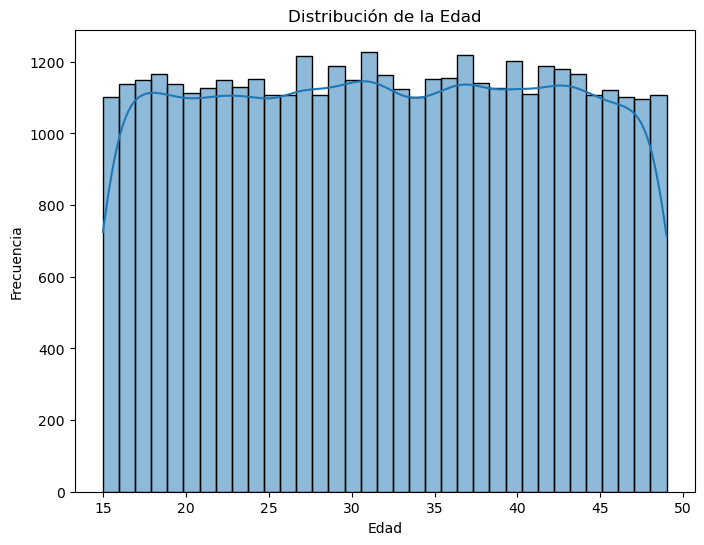

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=35)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Relación con EngagementLevel:


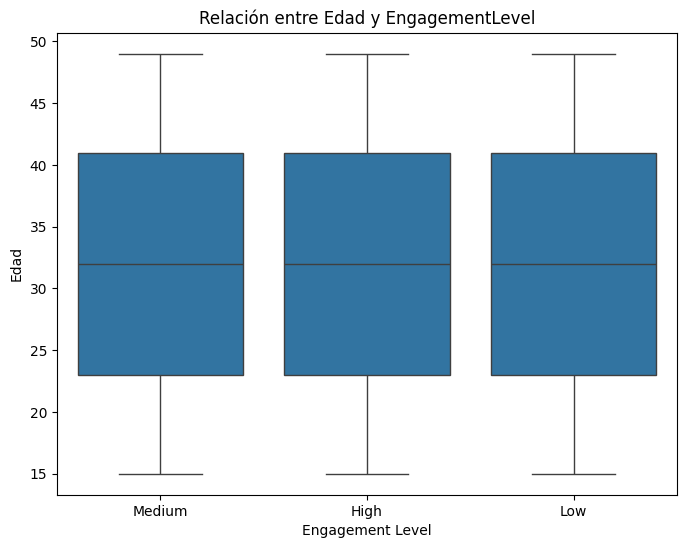

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='Age', data=df)
plt.title('Relación entre Edad y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Edad')
plt.show()

### Conclusion:
Respecto al analisis individual con la linea de densidad estimada podemos ver que que las edades dentro del dataframe estan bastante bien balanceadas.

En cuanto a la relacion con los datos de salida podemos ver que esta bastante bien distribuido entre edades y su EngagementLevel, es decir, que no tienen una relacion directa. Pero analizando, podemos decir que la edad media en los tres niveles es de aproximadamente 32 anios. El 50% de los usuarios esta entre 23/24 anios y 41 anios.

In [ ]:
# Contar cuántos usuarios hay de cada edad
conteo_edades = (df['Age'].value_counts()).sort_index()

# Edad máxima
edad_maxima = df['Age'].max()

# Edad mínima
edad_minima = df['Age'].min()

# Mostrar los resultados
print(f"Edad máxima: {edad_maxima}")
print(f"Edad mínima: {edad_minima}")

# Mostrar el conteo
print(conteo_edades)

2.2.2 Género (Gender)

Distribución:

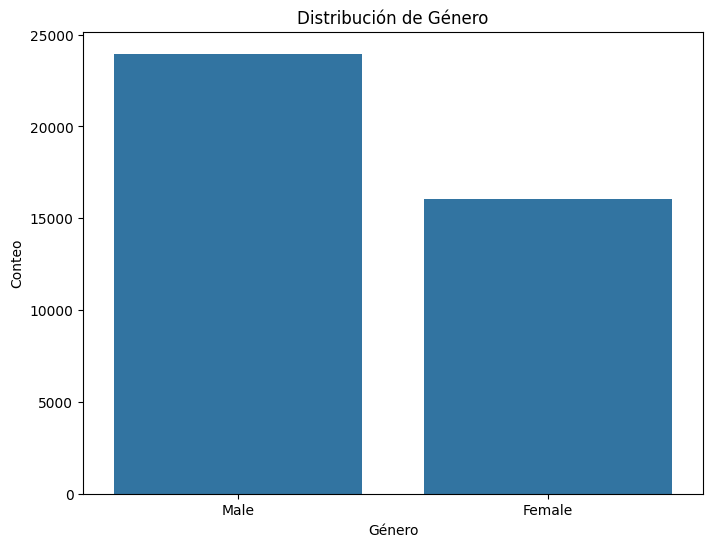

Gender
Male      23959
Female    16075
Name: count, dtype: int64


In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()

conteo_genero = df['Gender'].value_counts()
print(conteo_genero)

Relación con EngagementLevel:



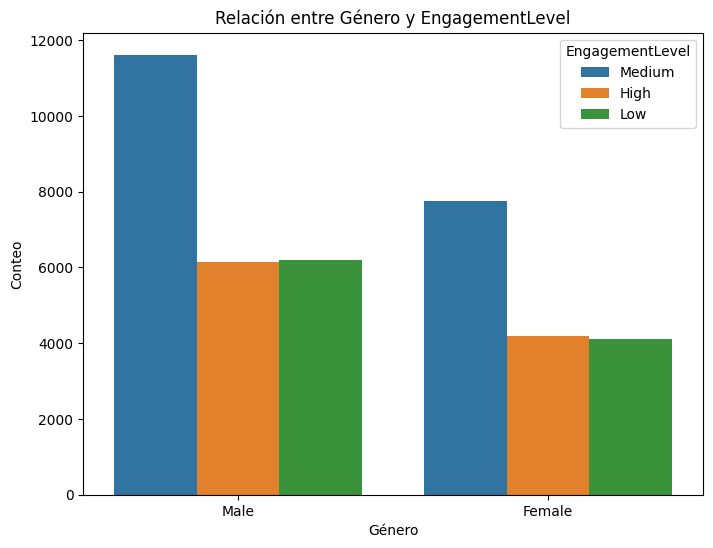

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='EngagementLevel', data=df)
plt.title('Relación entre Género y EngagementLevel')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.show()


### Conclusion:
Respecto al analisis individual podemos ver que la mayoria de los usuarios son hombres respecto a las mujeres, con una diferencia de 7884 usuarios.

En cuanto a la relacion con los datos de salida, podemos visualizar que respecto a la distribucion de EngagementLevel dependiendo el genero esta muy bien distribuida las cantidades. Donde Low y High en los dos generos poseen casi la misma cantidad de usuarios, y en cuando al Medium posee el doble en los dos casos.

2.2.3 Región (Location)

Distribución:

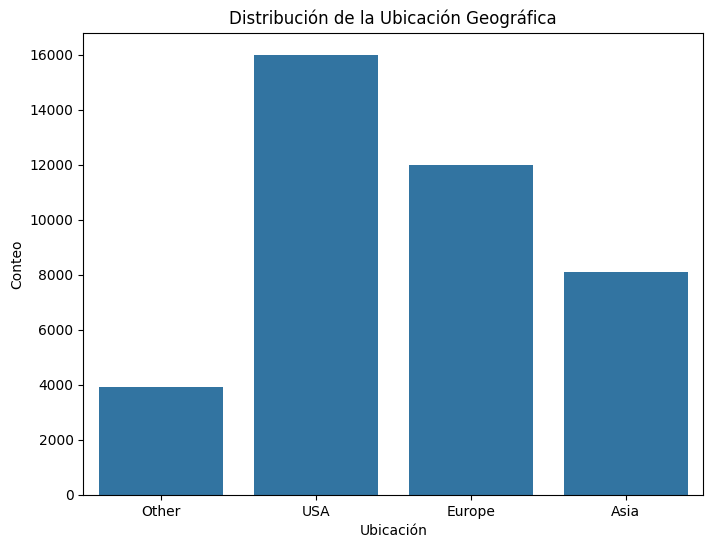

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Location', data=df)
plt.title('Distribución de la Ubicación Geográfica')
plt.xlabel('Ubicación')
plt.ylabel('Conteo')
plt.show()


Relación con EngagementLevel:



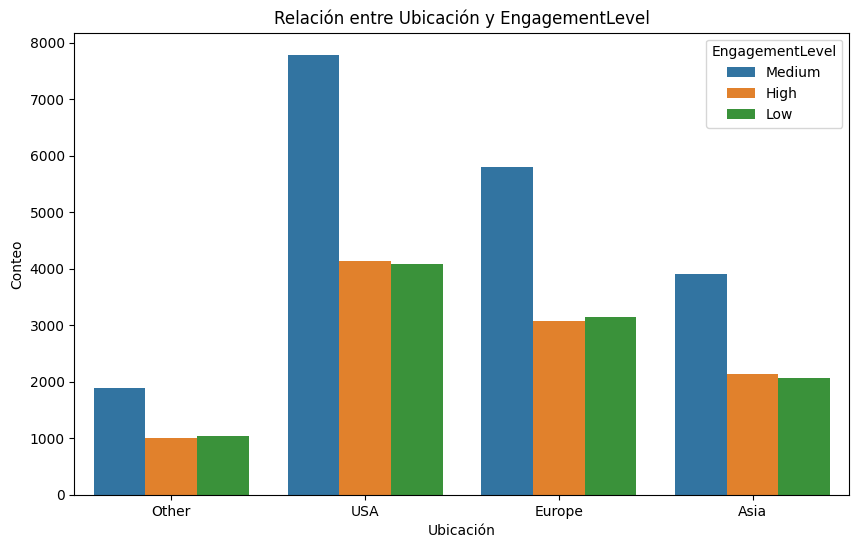

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='EngagementLevel', data=df)
plt.title('Relación entre Ubicación y EngagementLevel')
plt.xlabel('Ubicación')
plt.ylabel('Conteo')
plt.show()


### Conclusion:
Respecto al analisis individual, la cantidad de usuarios de este DataFrame esta mayoritariamente obtenido de jugadores de USA, luego otro gran porcentaje de Europa y luego Asia y otros. La cantidad de usuarios de Asia mas otros, es casi igual que la cantidad de usuarios en Europa. Y la cantidad de usuarios de Europa mas otros es casi igual a la cantidad de usuarios de USA.

Respecto a la relacion con los datos de salida podemos visualizar que en todas las ubicaciones predominan los usuarios Medium. Tambien, centrandonos por ubicacion, la cantidad de usuarios Medium es casi la suma de los usuarios High y Low.

2.2.4 Género de Juego (GameGenre)


Distribución:

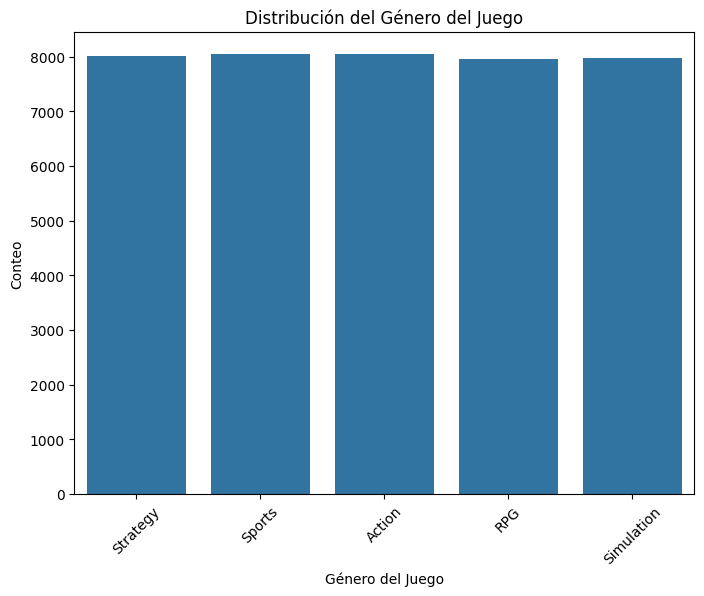

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='GameGenre', data=df)
plt.title('Distribución del Género del Juego')
plt.xlabel('Género del Juego')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()


Relación con EngagementLevel:



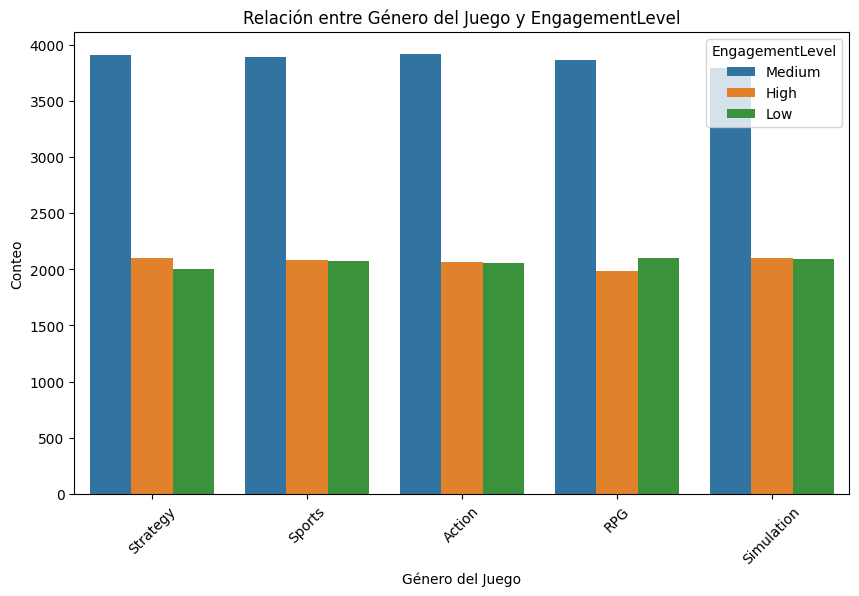

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GameGenre', hue='EngagementLevel', data=df)
plt.title('Relación entre Género del Juego y EngagementLevel')
plt.xlabel('Género del Juego')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()


### Conclusion:
Respecto al analisis individual, esta muy balanceado la cantidad de usuarios por genero de juego. Esto lo hace un dato bastante util para utilizar en temas de aprendizaje.

En cuanto a la relacion con los datos de salida nuevamente, por genero de juego, los usuarios High y Low poseen casi la misma cantidad de jugadores. Y su suma, da parecido a los usuarios Medium. Otra cosa a tener en cuenta, que en todos los EngagementLevel de cada genero de juego, poseen casi la misma cantidad de usuarios Medium.

2.2.5 Tiempo de Juego (PlayTimeHours)


Distribución:

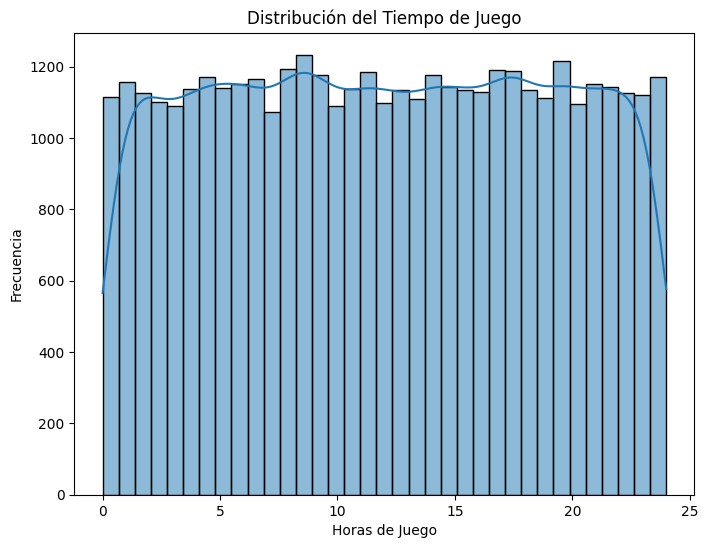

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['PlayTimeHours'], kde=True)
plt.title('Distribución del Tiempo de Juego')
plt.xlabel('Horas de Juego')
plt.ylabel('Frecuencia')
plt.show()


Relación con EngagementLevel:



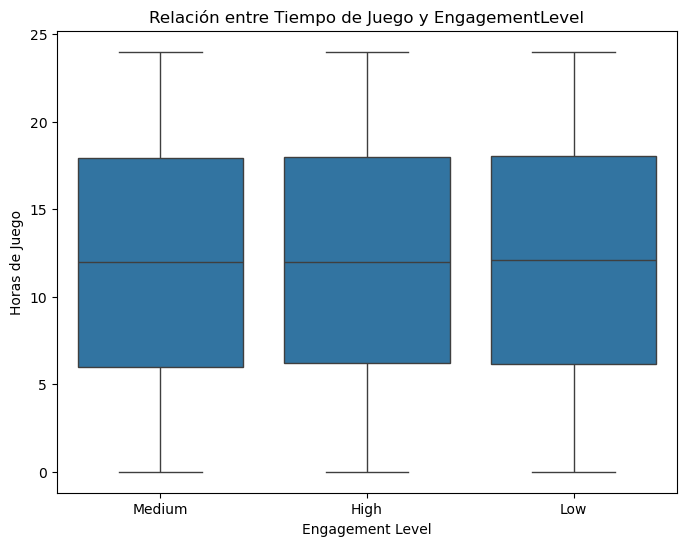

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=df)
plt.title('Relación entre Tiempo de Juego y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Horas de Juego')
plt.show()


### Conclusion:
Respecto al analisis indivual no se muestra una tendencia de la cantidad de horas jugadas. Solamente se puede ver en las puntas que nadie juega o muy poco o demasiado(24hrs).

En cuanto a la relacion en con los datos de salida el EngagementLevel no tiene un efecto muy directo respecto a la relacion con las horas de juego, lo que hace que las distribuciones sean bastante similares. Podriamos decir, sin importar su EngagementLevel la media de horas es de 12/13 horas, y el 50% de los usuarios de cada uno juega entre 6 horas y 18 horas.

2.2.6 Compras en el Juego (InGamePurchases)


Distribución:

/tmp/ipykernel_44112/315894832.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


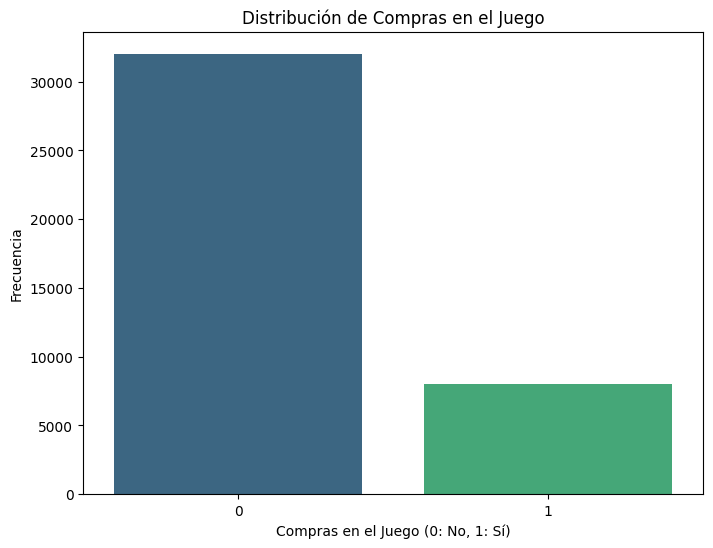

InGamePurchases
0    31993
1     8041
Name: count, dtype: int64


In [43]:
counts = df['InGamePurchases'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title('Distribución de Compras en el Juego')
plt.xlabel('Compras en el Juego (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.show()

cantidad_pagos=df['InGamePurchases'].value_counts()
print(cantidad_pagos)

Relación con EngagementLevel:

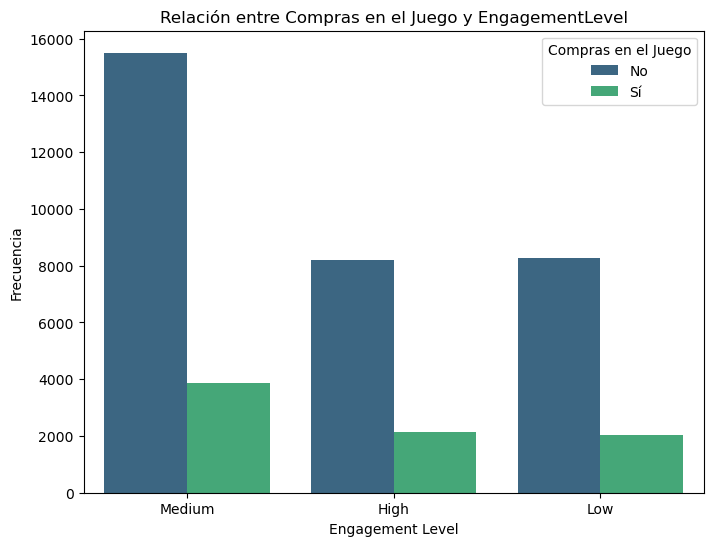

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='EngagementLevel', hue='InGamePurchases', data=df, palette="viridis")

# Personalizar el gráfico
plt.title('Relación entre Compras en el Juego y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Frecuencia')

plt.legend(title='Compras en el Juego', labels=['No', 'Sí'])

plt.show()

### Conclusion:
Respecto al analisis individual podemos ver notoriamente que aproximadamente 8000 usuarios solamente compran cosas dentro de los juegos, siendo un 20% del total. Esto podria afectar a alguna salida.

Si comparamos con los datos de salida, podemos ver que esta bien distribuido el tema del 20% de usuarios que compran dentro del juego segun su EngagementLevel. Vemos que sea lo que sea que compren dentro del juego no altera demasiado el EngagementLevel con el que se los clasifico. Puede ser una variante que ayude, pero no se ve que influya tan directamente.

2.2.7 Dificultad del Juego (GameDifficulty)

Distribución:

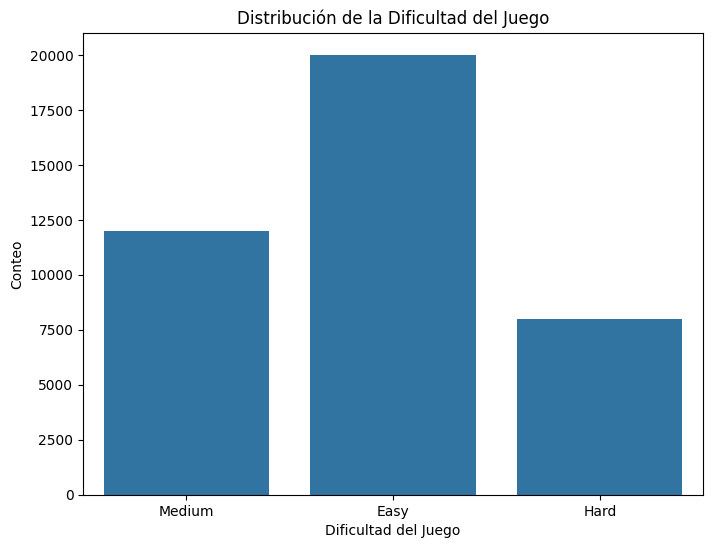

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='GameDifficulty', data=df)
plt.title('Distribución de la Dificultad del Juego')
plt.xlabel('Dificultad del Juego')
plt.ylabel('Conteo')
plt.show()


Relación con EngagementLevel:



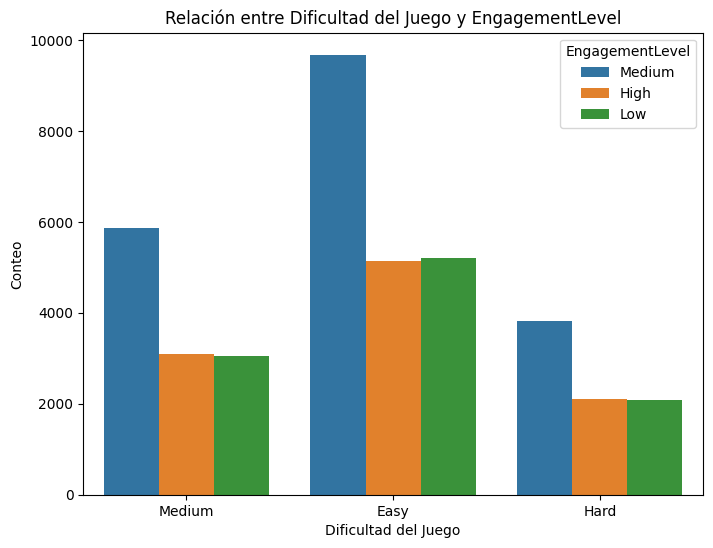

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='GameDifficulty', hue='EngagementLevel', data=df)
plt.title('Relación entre Dificultad del Juego y EngagementLevel')
plt.xlabel('Dificultad del Juego')
plt.ylabel('Conteo')
plt.show()


### Conclusion:
Analizando los datos individualmente, vemos que la mayoria de los usuarios juega en dificultad facil siendo casi el 50% de los mismos, entonces podemos decir que no esta distribuido equitativamente entre las dificultades. Podriamos tener en cuenta de que este se veria reflejado en la salida.

Ahora, si los comparamos con los datos de salida vemos que casi el 50% de usuarios en EngagementLevel Medium juega en dificultad facil siendo un factor que afecta directamente a la clasificacion. Por otro lado en las tres dificultades la suma de los EngagementLevel Low y High da el valor de Medium.

2.2.8 Sesiones por Semana (SessionsPerWeek)

Distribución:

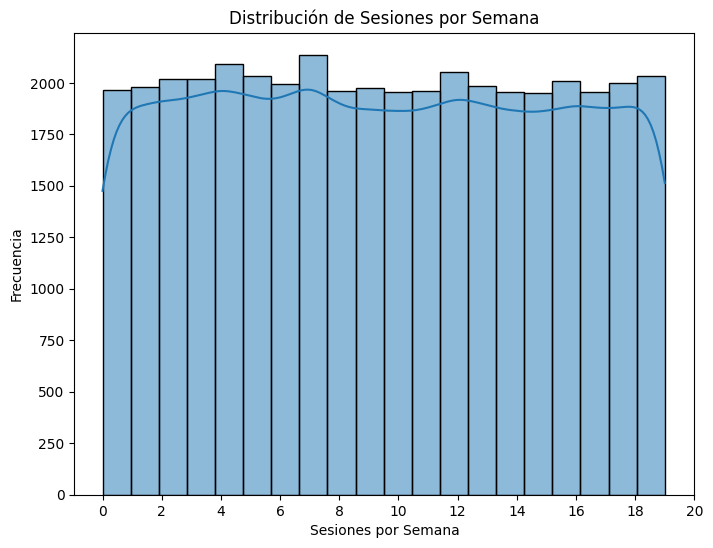

SessionsPerWeek
0     1967
1     1980
2     2018
3     2019
4     2091
5     2035
6     1993
7     2137
8     1963
9     1974
10    1956
11    1962
12    2052
13    1983
14    1958
15    1949
16    2009
17    1958
18    1998
19    2032
Name: count, dtype: int64


In [53]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SessionsPerWeek'], kde=True, bins=20)
plt.title('Distribución de Sesiones por Semana')
plt.xlabel('Sesiones por Semana')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 21, 2))
plt.show()

#ayuda para ver bien las cantidades
sesiones = (df['SessionsPerWeek'].value_counts()).sort_index()
print(sesiones)

Relación con EngagementLevel:

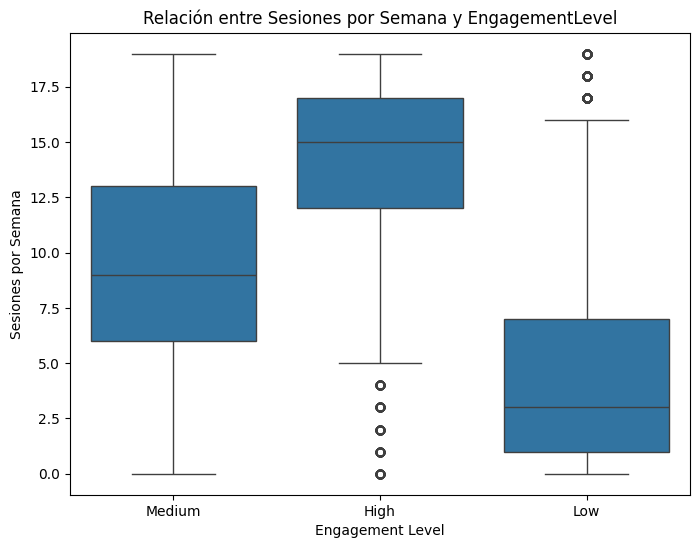

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=df)
plt.title('Relación entre Sesiones por Semana y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Sesiones por Semana')
plt.show()


### Conclusion:
En cuanto al analisis individual podemos decir que posee una distribucion bastante balanceada entre los jugadores y las sesiones por semana. Existe un pico entre las 7 y 8 sesiones donde varia la minima.

Respecto a la comparacion con los datos de salida, vemos que influye directamente la cantidad de sesiones por semana respecto al EngagementLevel asignado. Corroboramos que los asignados como High poseen una media de sesiones por semana mayor(15 sesiones) a los demas, teniendo casi su 50% de usuarios sobre los demas EngagementLevel(Low y Medium). Podemos afirmar que las sesiones por semana van a definir que EngagementLevel se te asigne. Mas sesiones, mejor asignacion.

2.2.9 Duración Promedio de Sesión (AvgSessionDurationMinutes)

Distribución:

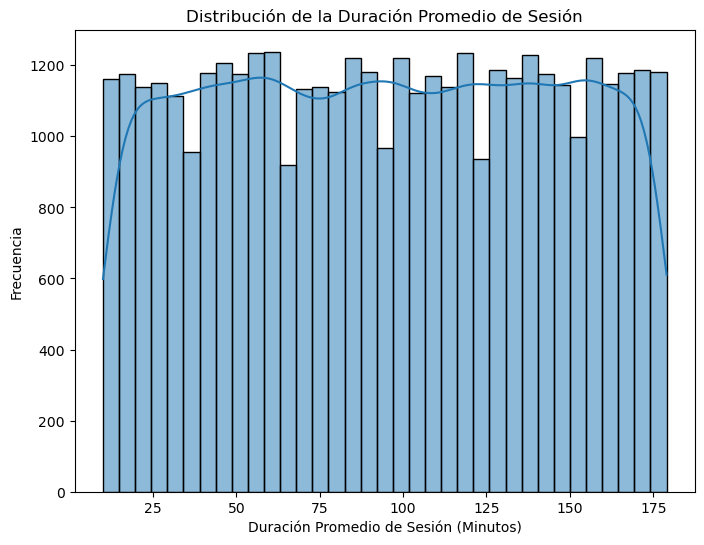

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AvgSessionDurationMinutes'], kde=True)
plt.title('Distribución de la Duración Promedio de Sesión')
plt.xlabel('Duración Promedio de Sesión (Minutos)')
plt.ylabel('Frecuencia')
plt.show()


Relación con EngagementLevel:



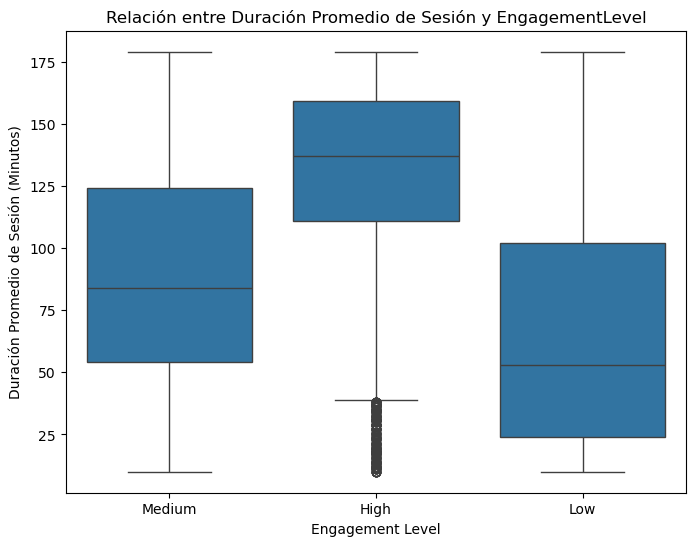

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=df)
plt.title('Relación entre Duración Promedio de Sesión y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Duración Promedio de Sesión (Minutos)')
plt.show()


### Conclusion:
Respecto al analisis individual de los datos podemos visualizar que esta bastante bien distribuido el promedio de minutos en sesion. Existen algunos picos bajos en cinco ocaciones, que a criterio nuestro puede ser dado a que son el tiempo suficiente o normal de algunas partidas de algunos juegos. Estos picos se ven en los 30 min, 60 min, 90 min, 120 min y 150 min. Siendo, el promedio de 30 min la demora de una partida de X juego. Teniendo en cuenta que juegue la partida(1, 2, 3, 4, o 5 partidas) y se salga.

Si lo analizamos comparando con los datos de salida nuevamente podemos ver que afecta directamente al EngagementLevel asignado el promedio de minutos por sesion. Mientras mas dure la sesion, mas posibilidades de que tu EngagementLevel sea el mas alto.

2.2.10 Nivel del Jugador (PlayerLevel)

Distribución:

PlayerLevel
49    419
Name: count, dtype: int64


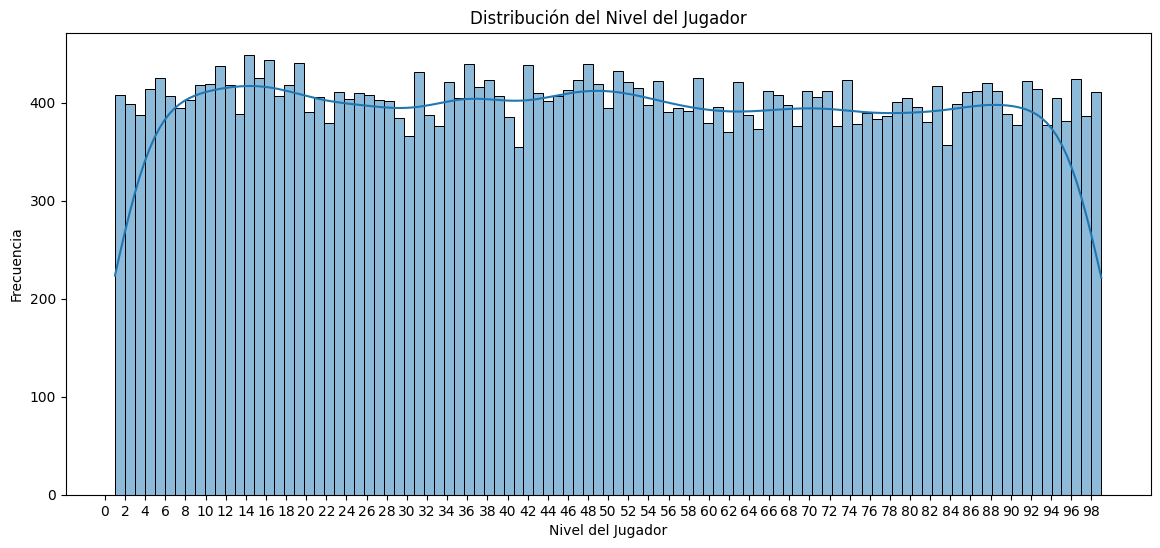

In [93]:
plt.figure(figsize=(14, 6))
sns.histplot(df['PlayerLevel'], kde=True, bins=99)
plt.title('Distribución del Nivel del Jugador')
plt.xlabel('Nivel del Jugador')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 100, 2))
plt.show

playerLevel = (df['PlayerLevel'].value_counts()).sort_index()
playerLevel= playerLevel.loc[49:49]
print(playerLevel)

Relación con EngagementLevel:



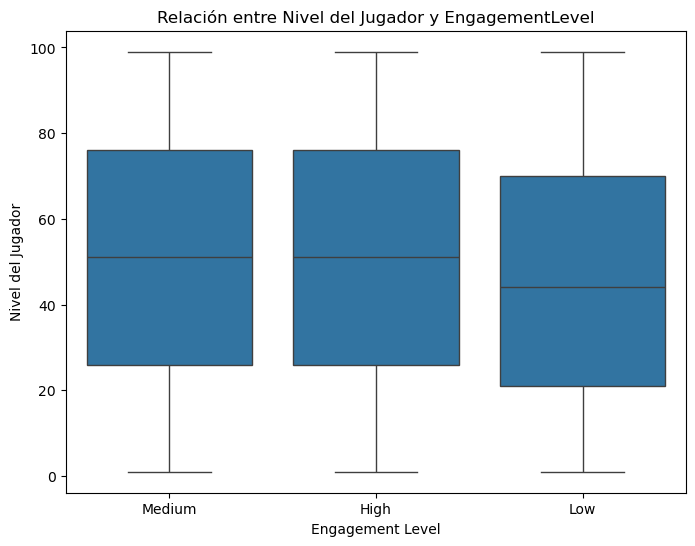

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=df)
plt.title('Relación entre Nivel del Jugador y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Nivel del Jugador')
plt.show()


### Conclusion:
Analizando los datos individualmente podemos ver que la distribucion es balanceada en cuanto al nivel de jugador aunque se visualizan algunos picos inferiores en algunos determinados niveles. No se puede sacar muchas concluciones solo con el dato del nivel del jugador.

Respecto a la comparativa de los datos de salida los jugadores con EngagementLevel High y Medium poseen una distribucion muy parecida en cuanto al nivel. Respecto a los denominados Low afirmamos que poseen un nivel de jugador menor.

2.2.11 Logros Desbloqueados (AchievementsUnlocked)

Distribución:

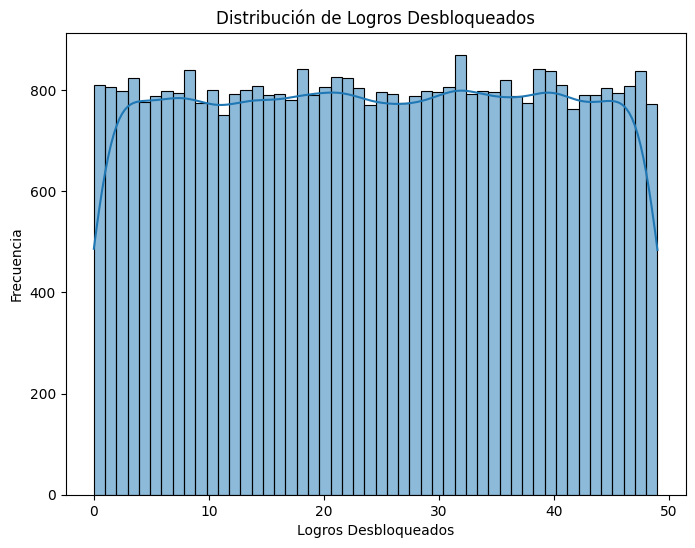

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AchievementsUnlocked'], kde=True, bins=50)
plt.title('Distribución de Logros Desbloqueados')
plt.xlabel('Logros Desbloqueados')
plt.ylabel('Frecuencia')
plt.show()


Relación con EngagementLevel:



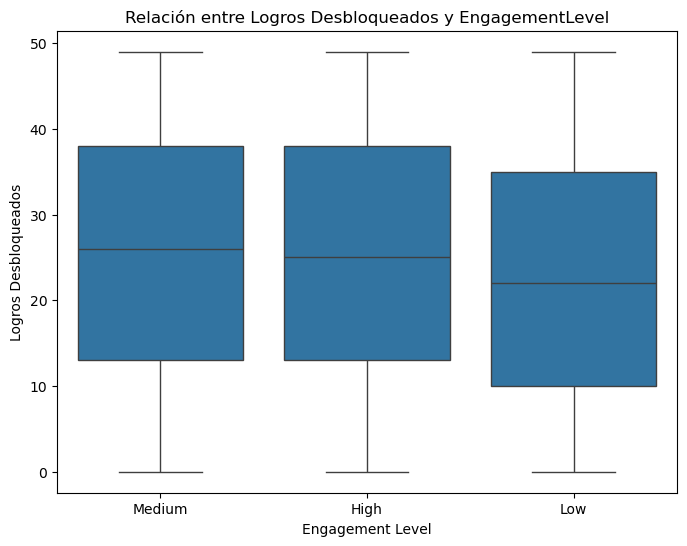

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='AchievementsUnlocked', data=df)
plt.title('Relación entre Logros Desbloqueados y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Logros Desbloqueados')
plt.show()


### Conclusion:
Analizando los datos individualmente visualizamos que la distribucion esta bastante balanceada en la cantidad de logros que tiene cada usuario. No es un dato muy observable para determinar algo.

Si lo analizamos con respecto a los datos de salida, podemos decir que los EngagementLevel Hight y Medium poseen un promedio de logros mayor que uno de nivel Low.

### Transformacion de valores 

Transformamos valores de tipo objeto a valores numericos 

In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Identificar las columnas de tipo 'object' o 'string'
categorical_columns = df.select_dtypes(include=['object']).columns

# Exploración inicial de las variables categóricas
print(f"Columnas categóricas: {categorical_columns}")

# Creación de una copia del dataframe para trabajar en las transformaciones
df_encoded = df.copy()

# Transformación de variables categóricas a valores numéricos
for column in categorical_columns:
    # Verificar la cantidad de categorías en la variable
    unique_values = df_encoded[column].nunique()

    if unique_values <= 10:
        # Aplicar One-Hot Encoding si la variable tiene pocas categorías
        df_encoded = pd.get_dummies(df_encoded, columns=[column], drop_first=False)
    else:
        # Aplicar Label Encoding si la variable tiene muchas categorías
        label_encoder = LabelEncoder()
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Transformar columnas booleanas a 0 y 1
for column in df_encoded.select_dtypes(include=['bool']).columns:
    df_encoded[column] = df_encoded[column].astype(int)

# Verificar la transformación
df_encoded.head()


Columnas categóricas: Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')


,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,...,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_High,EngagementLevel_Low,EngagementLevel_Medium
0,9000,43,16.271119,0,6,108,79,25,0,1,...,0,0,0,1,0,0,1,0,0,1
1,9001,29,5.525961,0,5,144,11,10,1,0,...,0,0,0,1,0,0,1,0,0,1
2,9002,22,8.223755,0,16,142,35,41,1,0,...,0,0,1,0,1,0,0,1,0,0
3,9003,35,5.265351,1,9,85,57,47,0,1,...,0,0,0,0,1,0,0,0,0,1
4,9004,33,15.531945,0,2,131,95,37,0,1,...,0,0,0,0,0,0,1,0,0,1


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   PlayTimeHours              40034 non-null  float64
 3   InGamePurchases            40034 non-null  int64  
 4   SessionsPerWeek            40034 non-null  int64  
 5   AvgSessionDurationMinutes  40034 non-null  int64  
 6   PlayerLevel                40034 non-null  int64  
 7   AchievementsUnlocked       40034 non-null  int64  
 8   Gender_Female              40034 non-null  int32  
 9   Gender_Male                40034 non-null  int32  
 10  Location_Asia              40034 non-null  int32  
 11  Location_Europe            40034 non-null  int32  
 12  Location_Other             40034 non-null  int32  
 13  Location_USA               40034 non-null  int

2.3 Análisis de Valores Nulos y Extremos

Vamos a verificar si las variables de entrada seleccionadas presentan valores nulos o extremos.

In [7]:
# Verificación de valores nulos en todo el DataFrame
missing_values = df_encoded.isnull().sum()
print("Valores nulos por columna:")
print(missing_values[missing_values > 0])

Valores nulos por columna:
Series([], dtype: int64)


In [8]:
# Identificación de columnas numéricas continuas
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Exclusión de columnas booleanas
numeric_columns = [col for col in numeric_columns if df_encoded[col].nunique() > 2]

# Verificación de valores extremos (outliers) utilizando el método IQR
Q1 = df_encoded[numeric_columns].quantile(0.25)
Q3 = df_encoded[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_encoded[numeric_columns] < (Q1 - 1.5 * IQR)) | 
            (df_encoded[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print("Valores extremos por columna numérica:")
print(outliers[outliers > 0])

Valores extremos por columna numérica:
Series([], dtype: int64)


Tal como podemos ver no existen valores nulos dentro del codigo ni variables que presenten extremos 

2.4 Análisis de Correlación Lineal entre Variables

Verificamos si existen variables altamente correlacionadas linealmente.

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación usando el método de Pearson
correlation_matrix = df_encoded.corr(method='pearson')

# Visualización de la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


NameError: name 'df_encoded' is not defined

2.5 Preguntas para el Encargado de Proveer los Datos

1) Definición del Engagement Level: ¿Cómo se define y calcula el nivel de engagement? ¿Es una clasificación hecha manualmente o se basa en algún algoritmo?

2) Origen de los Datos: ¿Los datos fueron recolectados de una única plataforma de juegos o provienen de múltiples fuentes?

3) Frecuencia de Actualización: ¿Cada cuánto tiempo se actualiza este dataset? ¿Los datos reflejan el comportamiento actual de los jugadores?

4) Propósito del Dataset: ¿Cuál es el objetivo principal al analizar este dataset? ¿Se espera construir un modelo predictivo, realizar análisis descriptivo, o algo más?

## Hipótesis Formulada:
### Hipótesis: "Los jugadores que pasan más tiempo en partidas tienen un mayor nivel de engagement."

La idea es que cuanto más tiempo invierte un jugador en las partidas, más comprometido (engaged) estará con el juego. Por lo tanto, esperaríamos que los jugadores con tiempos de juego altos tiendan a tener un nivel de engagement más alto (High).

1) Análisis para Validar la Hipótesis:
Primero, debemos analizar la relación entre el tiempo que pasan los jugadores en las partidas y su nivel de engagement.

In [3]:
# Revisión de las primeras filas del DataFrame
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


2) Análisis exploratorio de las variables de interés:

* EngagementLevel: Variable objetivo con valores categóricos (Low, Medium, High).
* AvgSessionDurationMinutes: Variable relacionada con el tiempo total que un jugador pasa en el juego por sesion.

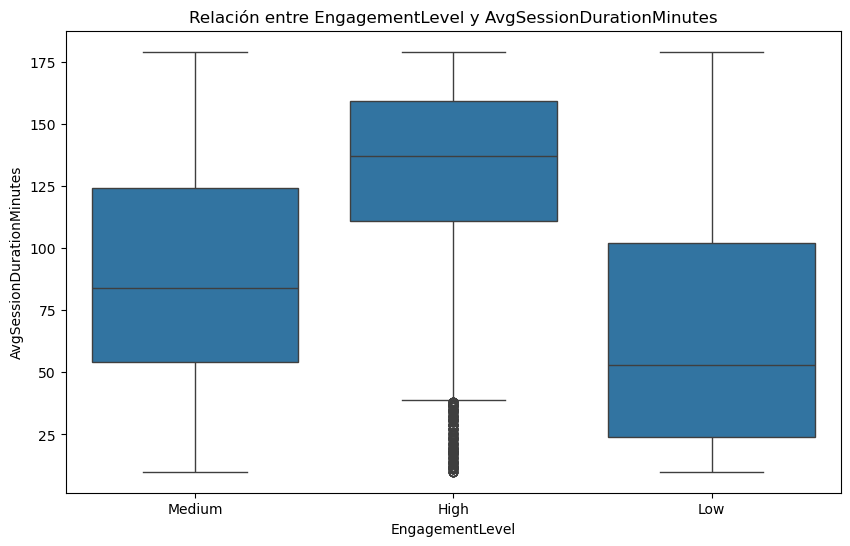

In [15]:
# Distribución de la variable 'EngagementLevel'
df['EngagementLevel'].value_counts()

# Descripción estadística de 'TotalTimeSpent'
df['AvgSessionDurationMinutes'].describe()

# Análisis de la relación entre 'TotalTimeSpent' y 'EngagementLevel'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=df)
plt.title('Relación entre EngagementLevel y AvgSessionDurationMinutes')
plt.show()


### Conclusión sobre la Hipótesis
La hipótesis de que "los jugadores que pasan más tiempo en partidas tienen un mayor nivel de engagement" parece estar parcialmente validada:

Validación Parcial: Los jugadores con un nivel de engagement alto (High) tienden a tener sesiones más largas en promedio comparado con aquellos con engagement medio o bajo.

Consideraciones: Sin embargo, la relación no es completamente lineal, ya que algunos jugadores con engagement alto tienen tiempos de sesión comparables a los de engagement bajo. Esto podría indicar que otros factores además del tiempo de juego están influyendo en el nivel de engagement.

Este análisis sugiere que el tiempo de sesión promedio es un factor importante pero no el único determinante del nivel de engagement de un jugador. Se podría profundizar en otros factores adicionales que podrían estar influyendo en el engagement.

## Hallazgos
Podemos ver otras relaciones donde la variable de salida EngagementLevel tiene alta relacion con las Sesiones por semana que influye bastante, tambien las variables de Nivel de jugador y Logros desbloqueados.


Respecto a las Sesiones por semana podemos ver que afecta a la distribucion de que mayor cantidad de Sesiones por semana, mayor va a ser el EngagementLevel.


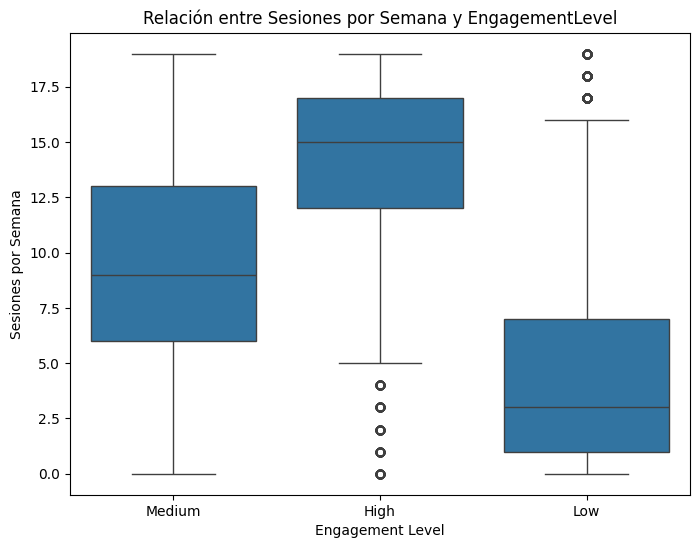

In [97]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=df)
plt.title('Relación entre Sesiones por Semana y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Sesiones por Semana')
plt.show()

En cuanto el Nivel de jugador y Logros desbloqueados, tambien ayudan a la clasificacion del EngagementLevel del usuario.

### Nivel del jugador

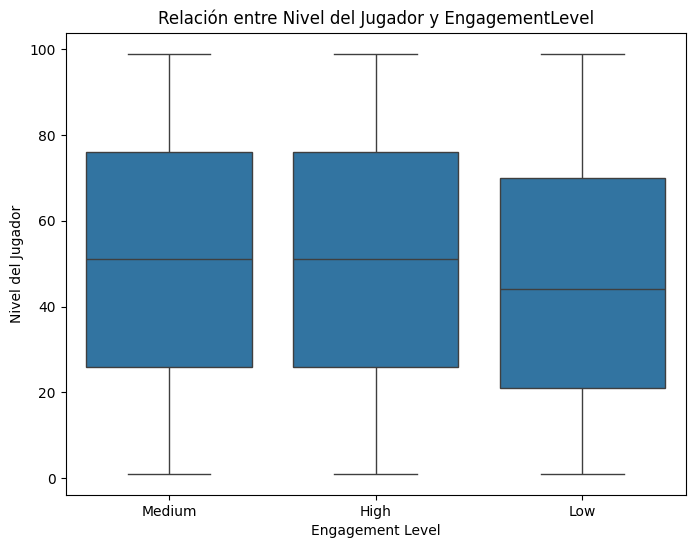

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=df)
plt.title('Relación entre Nivel del Jugador y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Nivel del Jugador')
plt.show()

### Logros Desbloqueados

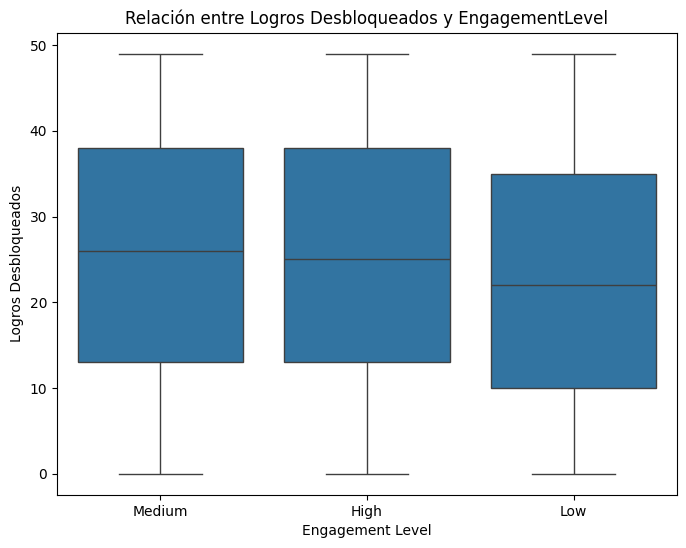

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='EngagementLevel', y='AchievementsUnlocked', data=df)
plt.title('Relación entre Logros Desbloqueados y EngagementLevel')
plt.xlabel('Engagement Level')
plt.ylabel('Logros Desbloqueados')
plt.show()

## Variables que se podrian crear a partir de los datos existentes

Feature engineering, puede ser muy beneficiosa en problemas de modelado predictivo. Esto es útil cuando queremos capturar relaciones o patrones que no son directamente evidentes en las variables originales.

#### Posibles Nuevas Variables para Crear:
1) Relación entre PlayTimeHours y AvgSessionDurationMinutes:

Descripción: Crear una variable que mida cuántas horas juega en promedio el usuario por sesión.

Cómo calcularlo: AvgPlayTimePerSession = PlayTimeHours / (AvgSessionDurationMinutes / 60)

Beneficio: Esto capturaría si los jugadores que juegan por periodos más cortos, pero más frecuentemente, tienen un nivel de engagement diferente.

2) Nivel de Logro Relativo:

Descripción: Crear una variable que relacione el número de logros desbloqueados con el nivel del jugador.

Cómo calcularlo: AchievementRatio = AchievementsUnlocked / PlayerLevel

Beneficio: Esto podría revelar si los jugadores que desbloquean logros más rápido tienen un nivel de engagement mayor.

3) Edad Ajustada por Nivel de Juego:

Descripción: Crear una variable que compare la edad del jugador con su nivel de juego.

Cómo calcularlo: AgeAdjustedLevel = Age / PlayerLevel

Beneficio: Esto podría indicar si los jugadores más jóvenes o mayores tienen una progresión diferente en el juego y si eso afecta su engagement.

## Modelado

#### Transformers y Pipeline

Transformamos las variables aplicando transformadores y modelos usando un PipeLine

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Separar variables de entrada y salida
X = df.drop(columns=['EngagementLevel'])
y = df['EngagementLevel']

In [5]:
# Identificar las columnas categóricas, booleanas y numéricas
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

print(categorical_columns)
print(numeric_columns)

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty'], dtype='object')
Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')


In [6]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
    (['Age'],[StandardScaler()]),
    (['PlayTimeHours'],[StandardScaler()]),
    (['InGamePurchases'],[StandardScaler()]),
    (['SessionsPerWeek'],[StandardScaler()]),
    (['AvgSessionDurationMinutes'],[StandardScaler()]),
    (['PlayerLevel'],[StandardScaler()]),
    (['AchievementsUnlocked'],[StandardScaler()]),
    (['Gender'],[OneHotEncoder(drop='first')]),
    (['Location'],[OneHotEncoder(drop='first')]),
    (['GameGenre'],[OneHotEncoder(drop='first')]),
    (['GameDifficulty'],[OneHotEncoder(drop='first')])
]
,df_out=True)

In [7]:
# Ajustar y transformar los datos
mapper.fit(X)
transformed_df = mapper.transform(X)
print(transformed_df.head())

        Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0  1.096023       0.614176        -0.501334        -0.602363   
1 -0.297969      -0.939816        -0.501334        -0.775865   
2 -0.994965      -0.549654        -0.501334         1.132666   
3  0.299456      -0.977506         1.994676        -0.081854   
4  0.100314       0.507275        -0.501334        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  Gender  \
0                   0.269487     1.026459              0.032814     1.0   
1                   1.004019    -1.352160             -1.006648     0.0   
2                   0.963212    -0.512647              1.141573     0.0   
3                  -0.199798     0.256906              1.557358     1.0   
4                   0.738771     1.586134              0.864383     1.0   

   Location_0  Location_1  Location_2  GameGenre_0  GameGenre_1  GameGenre_2  \
0         0.0         1.0         0.0          0.0          0.0          0.0   
1   

In [8]:
# Dividir el dataset en train, validation y test (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Regresion Logistica

In [100]:
# Crear el Pipeline
pipeline_rl = Pipeline(steps=[
    ('mapper', mapper),
    ('classifier', LogisticRegression())
])

In [101]:
# Entrenar el modelo
pipeline_rl.fit(X_train, y_train)

Pipeline(steps=[('mapper',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['Age'], [StandardScaler()]),
                                           (['PlayTimeHours'],
                                            [StandardScaler()]),
                                           (['InGamePurchases'],
                                            [StandardScaler()]),
                                           (['SessionsPerWeek'],
                                            [StandardScaler()]),
                                           (['AvgSessionDurationMinutes'],
                                            [StandardScaler()]),
                                           (['PlayerLevel'],
                                            [StandardScaler()]),
                                           (['AchievementsUnlocked'],
                                            [StandardScaler()]),
                                           (['Gender'],
                                            [OneHotEncoder(drop='first')]),
                                           (['Location'],
                                            [OneHotEncoder(drop='first')]),
                                           (['GameGenre'],
                                            [OneHotEncoder(drop='first')]),
                                           (['GameDifficulty'],
                                            [OneHotEncoder(drop='first')])])),
                ('classifier', LogisticRegression())])

### KNN

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 10, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

pipeline_knn = Pipeline([
    ('mapper', mapper),
    ('classifier', clf)
])

pipeline_knn.fit(X_train, y_train)

clf.best_score_, clf.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Program Files\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Program Files\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(0.8162364696086595, {'n_neighbors': 50})

### Random Forest

In [20]:
import graphviz  # pip install graphviz
from sklearn.tree import export_graphviz

def graph_tree(tree, col_names):
    graph_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=col_names,
        class_names=['low', 'medium', 'high'],
        filled=True,
        rounded=True,
        special_characters=True,
    )
    graph = graphviz.Source(graph_data)
    return graph

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=8, random_state=42)

# Crear el Pipeline
pipeline_rf = Pipeline([
    ('mapper', mapper),
    ('classifier', rf_clf)
])

# Entrenar el pipeline
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('mapper',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['Age'], [StandardScaler()]),
                                           (['PlayTimeHours'],
                                            [StandardScaler()]),
                                           (['InGamePurchases'],
                                            [StandardScaler()]),
                                           (['SessionsPerWeek'],
                                            [StandardScaler()]),
                                           (['AvgSessionDurationMinutes'],
                                            [StandardScaler()]),
                                           (['PlayerLevel'],
                                            [StandardScaler()]),
                                           (['AchievementsUnlocked'],
                                            [StandardScaler()]),
                                           (['Gender'],
                                            [OneHotEncoder(drop='first')]),
                                           (['Location'],
                                            [OneHotEncoder(drop='first')]),
                                           (['GameGenre'],
                                            [OneHotEncoder(drop='first')]),
                                           (['GameDifficulty'],
                                            [OneHotEncoder(drop='first')])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=8,
                                        random_state=42))])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.436922 to fit


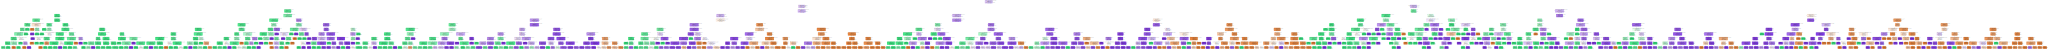

In [21]:
graph_tree(rf_clf.estimators_[0], col_names=mapper.transformed_names_)

## Evaluacion de modelos

In [15]:
from sklearn import metrics

def evaluate_model(model, X_train, y_train, X_val, y_val, title='', show_cm=False, average='weighted'):
    """
    Evalúa un modelo en conjuntos de entrenamiento y validación para problemas multiclase.

    Parameters:
    - model: El modelo a evaluar.
    - X_train, y_train: Conjunto de entrenamiento.
    - X_val, y_val: Conjunto de validación.
    - title: Título opcional para mostrar en la salida.
    - show_cm: Booleano para decidir si mostrar la matriz de confusión.
    - average: Tipo de promedio para las métricas ('micro', 'macro', 'weighted', None).

    Returns:
    - DataFrame con métricas de rendimiento (Accuracy, Precision, Recall, F1).
    """
    if title:
        display(title)

    final_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
    }

    # Diccionario para iterar sobre los conjuntos
    datasets = {
        'train': (X_train, y_train),
        'validation': (X_val, y_val),
    }

    for set_name, (X, y) in datasets.items():
        y_pred = model.predict(X)
        final_metrics['Accuracy'].append(metrics.accuracy_score(y, y_pred))
        final_metrics['Precision'].append(metrics.precision_score(y, y_pred, average=average))
        final_metrics['Recall'].append(metrics.recall_score(y, y_pred, average=average))
        final_metrics['F1'].append(metrics.f1_score(y, y_pred, average=average))

        if show_cm:
            cm = metrics.confusion_matrix(y, y_pred)
            cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                                     display_labels=model.classes_)
            cm_plot.plot(cmap="Blues")
            cm_plot.ax_.set_title(f'Confusion Matrix - {set_name}')

    # Mostrar las métricas en un DataFrame
    metrics_df = pd.DataFrame(final_metrics, index=['train', 'validation'])
    display(metrics_df)

# Ejemplo de uso:
# evaluate_model(model, X_train, y_train, X_val, y_val, title='Evaluation Results', show_cm=True)

#### Evaluacion Regresion Logistica

'Evaluation Results'

,Accuracy,Precision,Recall,F1
train,0.823647,0.825365,0.823647,0.822430
validation,0.828275,0.829615,0.828275,0.826975


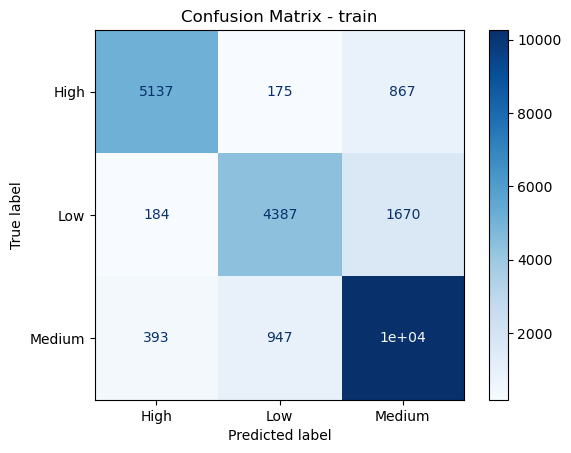

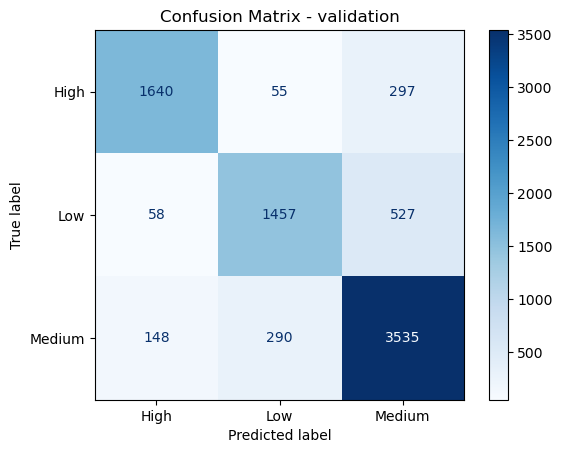

In [102]:
evaluate_model(pipeline_rl, X_train, y_train, X_val, y_val, title='Evaluation Results', show_cm=True)

### Evaluacion KNN

'Evaluation Results'

,Accuracy,Precision,Recall,F1
train,0.829642,0.846600,0.829642,0.825099
validation,0.823654,0.840419,0.823654,0.818712


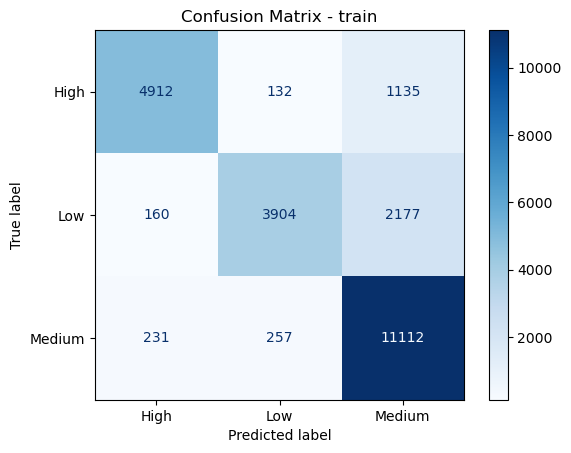

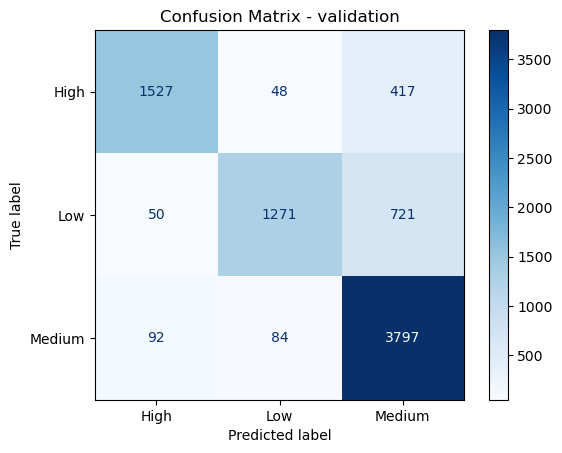

In [104]:
evaluate_model(pipeline_knn, X_train, y_train, X_val, y_val, title='Evaluation Results', show_cm=True)

### Evaluacion Random Forest

'Evaluation Results'

,Accuracy,Precision,Recall,F1
train,0.929059,0.929582,0.929059,0.928677
validation,0.913076,0.913371,0.913076,0.912700


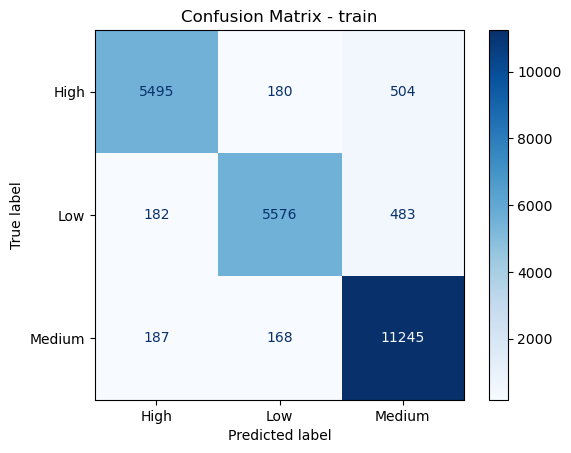

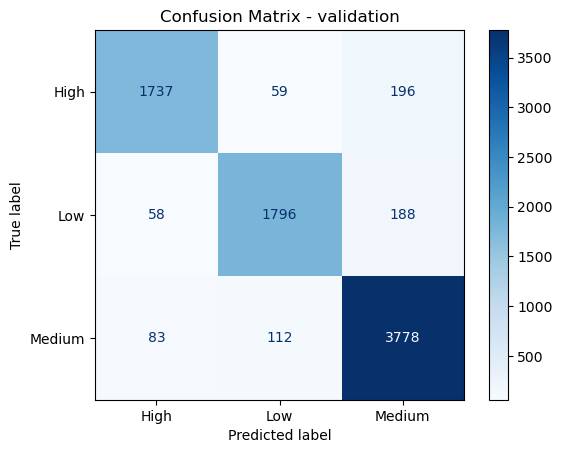

In [33]:
evaluate_model(pipeline_rf, X_train, y_train, X_val, y_val, title='Evaluation Results', show_cm=True)

## Aplicamos Feature Engineering

Primero intentamos creando una nueva feature llama "TotalWeeklyPlaytime" que funciona como una combinacion de "SessionsPerWeek" y "AvgSessionDurationMinutes"

In [3]:
df['TotalWeeklyPlaytime'] = df['SessionsPerWeek'] * df['AvgSessionDurationMinutes']

Luego dividimos "AgeGroup" y "ExperienceLevel" en grupos en base a la data

In [4]:
# Binning Age and PlayerLevel
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['Teen', '20s', '30s', '40s', '50+'])
df['ExperienceLevel'] = pd.cut(df['PlayerLevel'], bins=[0, 20, 50, 100], labels=['Beginner', 'Intermediate', 'Expert'])

In [5]:
df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,TotalWeeklyPlaytime,AgeGroup,ExperienceLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium,648,40s,Expert
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium,720,30s,Beginner
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High,2272,20s,Intermediate
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium,765,30s,Expert
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium,262,30s,Expert


Dividimos el nuevo set de datos

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

X_fe = df.drop(columns=['EngagementLevel'])  # Assuming EngagementLevel is the target
y_fe = df['EngagementLevel']

# Dividir el dataset en train, validation y test (60% train, 20% val, 20% test)
X_train_fe, X_temp_fe, y_train_fe, y_temp_fe = train_test_split(X_fe, y_fe, test_size=0.4, random_state=42)
X_val_fe, X_test_fe, y_val_fe, y_test_fe = train_test_split(X_temp_fe, y_temp_fe, test_size=0.5, random_state=42)

Separamos los datos en categoricos y numericos

In [25]:
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'AgeGroup', 'ExperienceLevel']
numerical_cols = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'TotalWeeklyPlaytime']

In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


### Evaluacion de modelos con Feature Engineering

#### Regresion Logistica con Feature Engineering

In [27]:
logreg = LogisticRegression()

pipeline_logistica = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

In [28]:
pipeline_logistica.fit(X_train_fe, y_train_fe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'PlayTimeHours',
                                                   'SessionsPerWeek',
                                                   'AvgSessionDurationMinutes',
                                                   'TotalWeeklyPlaytime']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Location',
                                                   'GameGenre',
                                                   'GameDifficulty', 'AgeGroup',
                                                   'ExperienceLevel'])])),
                ('classifier', LogisticRegression())])

#### KNN con Feature Engineering

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 10, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

pipeline_knn_fe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

pipeline_knn_fe.fit(X_train_fe, y_train_fe)

clf.best_score_, clf.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


(0.8394671107410492, {'n_neighbors': 100})

#### Random Forest con Feature Engineering

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Crear el clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=8, random_state=42)

# Crear el Pipeline
pipeline_rf_fe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_clf)
])

# Entrenar el pipeline
pipeline_rf_fe.fit(X_train_fe, y_train_fe)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'PlayTimeHours',
                                                   'SessionsPerWeek',
                                                   'AvgSessionDurationMinutes',
                                                   'TotalWeeklyPlaytime']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Location',
                                                   'GameGenre',
                                                   'GameDifficulty', 'AgeGroup',
                                                   'ExperienceLevel'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=8,
                                        random_state=42))])

### Evaluacion de modelos con Feature Engineering

#### Evaluacion Regresion Logistica

'Evaluation Results'

,Accuracy,Precision,Recall,F1
train,0.861407,0.863409,0.861407,0.861259
validation,0.864369,0.865904,0.864369,0.864037


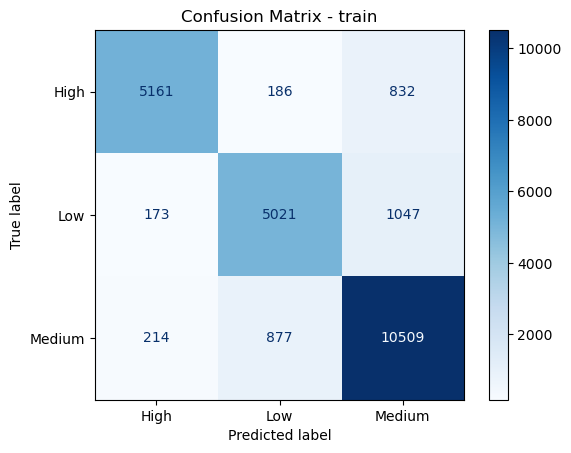

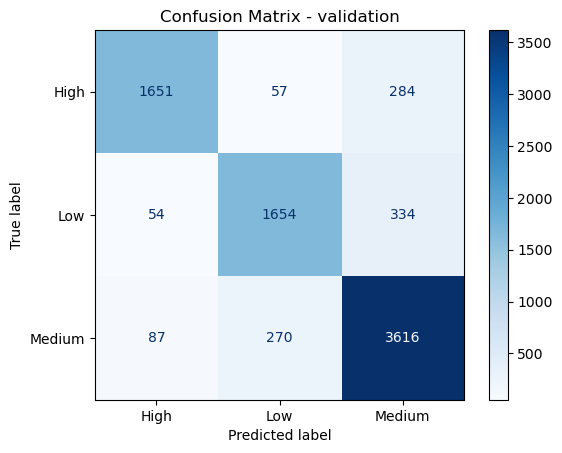

In [32]:
evaluate_model(pipeline_logistica, X_train_fe, y_train_fe, X_val_fe, y_val_fe, title='Evaluation Results', show_cm=True)

#### Evaluacion KNN

'Evaluation Results'

,Accuracy,Precision,Recall,F1
train,0.845754,0.855940,0.845754,0.842556
validation,0.848882,0.858187,0.848882,0.845695


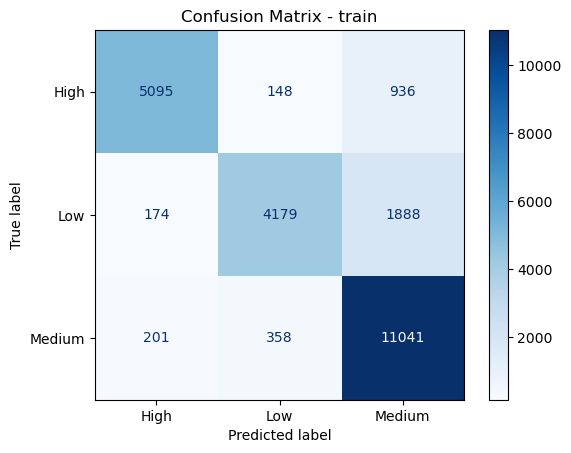

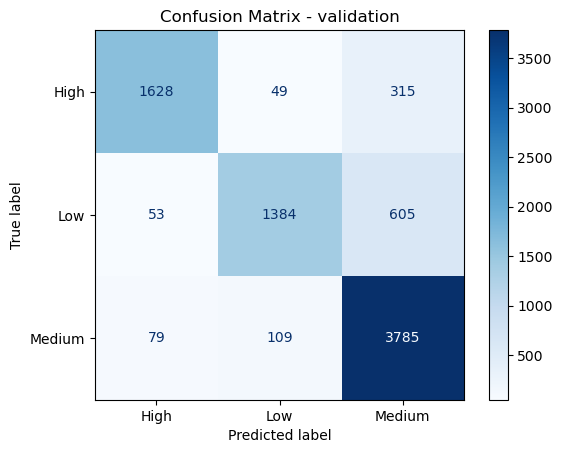

In [33]:
evaluate_model(pipeline_knn_fe, X_train_fe, y_train_fe, X_val_fe, y_val_fe, title='Evaluation Results', show_cm=True)

#### Evaluacion de modelo con Random Forest

'Evaluation Results'

,Accuracy,Precision,Recall,F1
train,0.911366,0.911700,0.911366,0.911160
validation,0.894842,0.895044,0.894842,0.894664


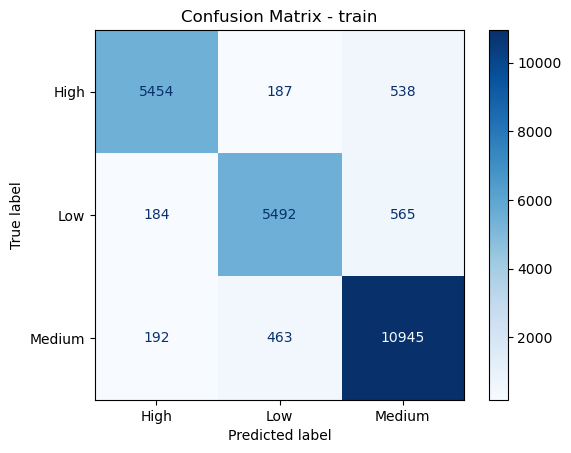

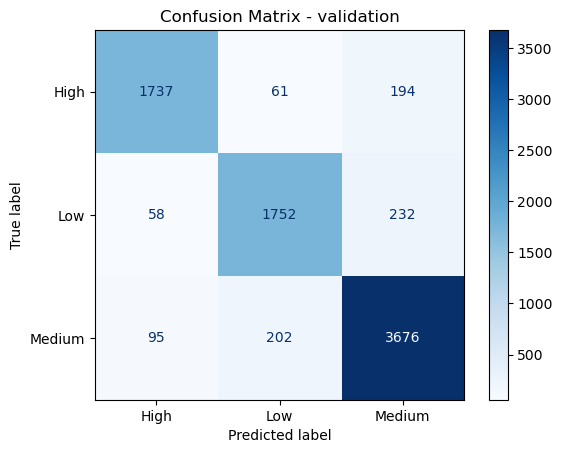

In [34]:
evaluate_model(pipeline_rf_fe, X_train_fe, y_train_fe, X_val_fe, y_val_fe, title='Evaluation Results', show_cm=True)